In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('train.csv')

In [3]:
dt = pd.DatetimeIndex(data['datetime'])

data['day'] = dt.day
data['month'] = dt.month
data['year'] = dt.year
data['hours'] = dt.hour
data['minutes'] = dt.minute
data['seconds'] = dt.second
data.drop(columns='datetime', inplace=True)

In [4]:
scaler = StandardScaler()
scaled = scaler.fit_transform(data)

In [5]:
dataframe = pd.DataFrame(scaled, columns = data.columns)
dataframe

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day,month,year,hours,minutes,seconds
0,-1.349864,-0.17149,-1.460672,-0.660178,-1.333661,-1.092737,0.993213,-1.567754,-0.660992,-0.943854,-0.969294,-1.642070,-1.603121,-1.003866,-1.668944,0.0,0.0
1,-1.349864,-0.17149,-1.460672,-0.660178,-1.438907,-1.182421,0.941249,-1.567754,-0.560908,-0.818052,-0.836797,-1.642070,-1.603121,-1.003866,-1.524341,0.0,0.0
2,-1.349864,-0.17149,-1.460672,-0.660178,-1.438907,-1.182421,0.941249,-1.567754,-0.620958,-0.851158,-0.880962,-1.642070,-1.603121,-1.003866,-1.379739,0.0,0.0
3,-1.349864,-0.17149,-1.460672,-0.660178,-1.333661,-1.092737,0.681430,-1.567754,-0.660992,-0.963717,-0.985856,-1.642070,-1.603121,-1.003866,-1.235137,0.0,0.0
4,-1.349864,-0.17149,-1.460672,-0.660178,-1.333661,-1.092737,0.681430,-1.567754,-0.721042,-1.023307,-1.052104,-1.642070,-1.603121,-1.003866,-1.090534,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,1.338012,-0.17149,0.684616,-0.660178,-0.596935,-0.467310,-0.617666,1.617227,-0.580925,1.148417,0.797333,1.644787,1.590639,0.996149,1.078500,0.0,0.0
10882,1.338012,-0.17149,0.684616,-0.660178,-0.702182,-0.735182,-0.253919,0.269704,-0.520875,0.499548,0.272866,1.644787,1.590639,0.996149,1.223102,0.0,0.0
10883,1.338012,-0.17149,0.684616,-0.660178,-0.807428,-0.913959,-0.046064,0.269704,-0.640975,0.055934,-0.130146,1.644787,1.590639,0.996149,1.367704,0.0,0.0
10884,1.338012,-0.17149,0.684616,-0.660178,-0.807428,-0.735182,-0.046064,-0.832442,-0.480841,-0.255258,-0.345454,1.644787,1.590639,0.996149,1.512307,0.0,0.0


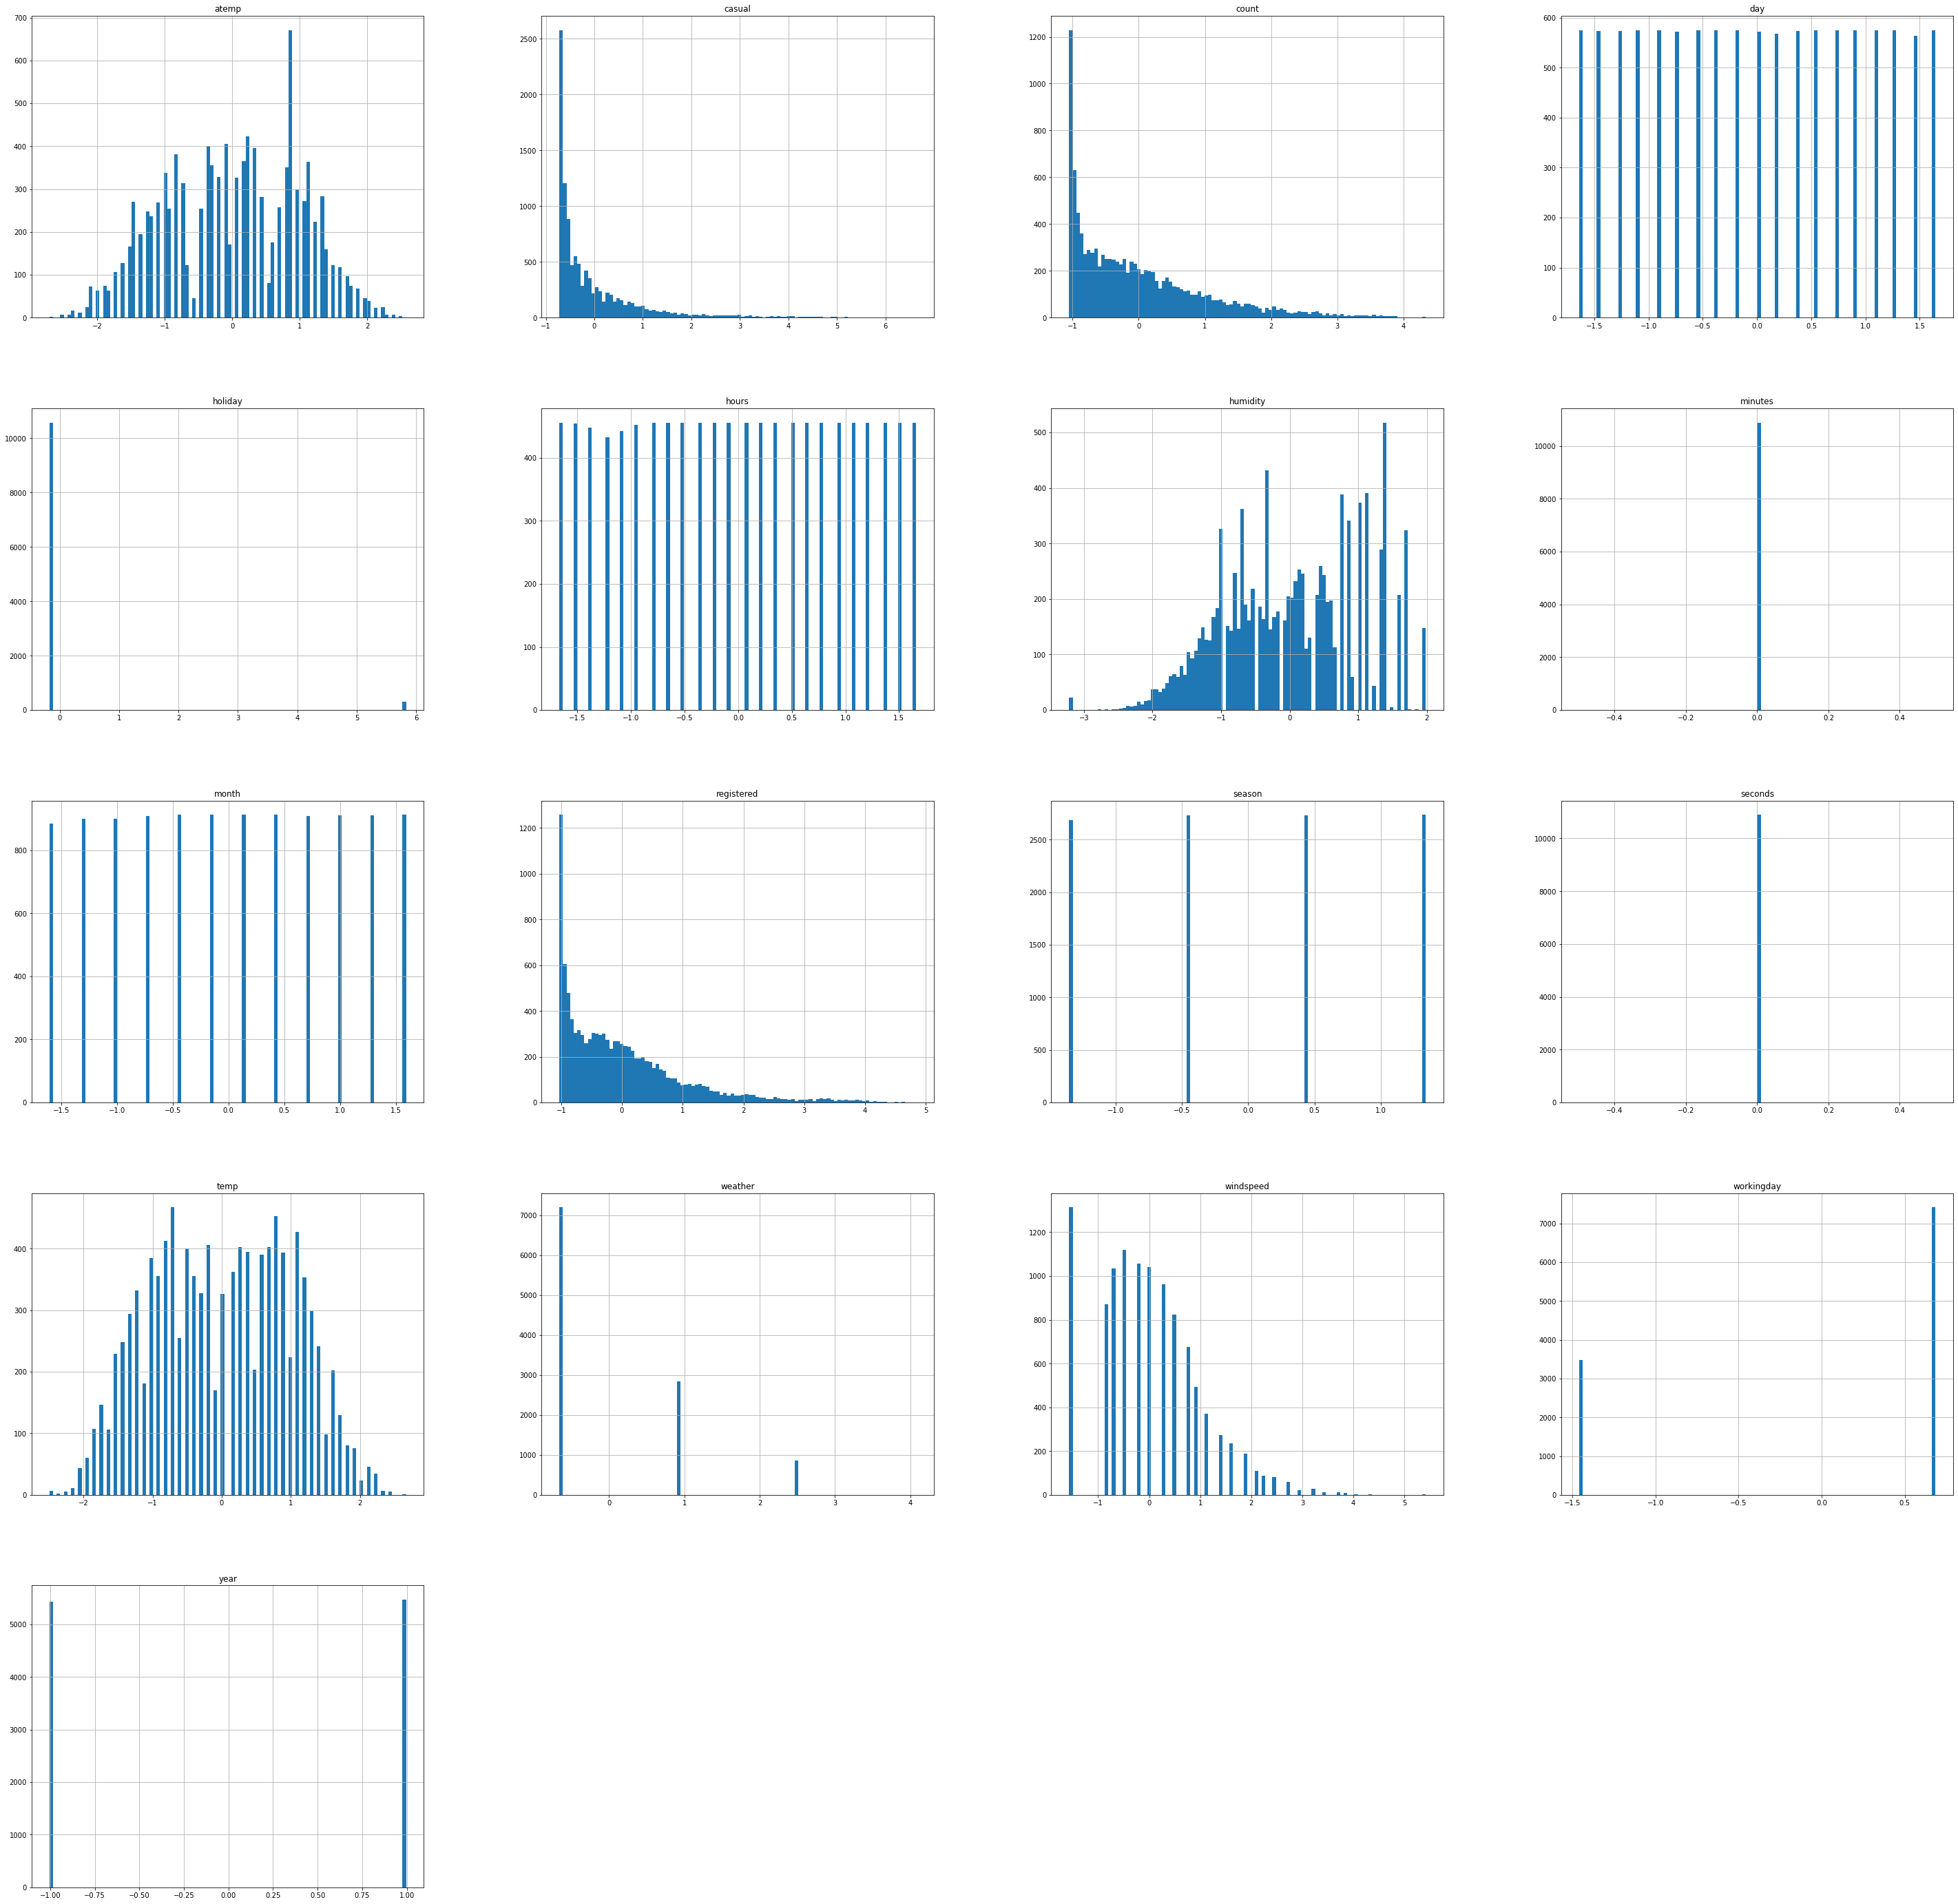

In [6]:
dataframe.hist(bins=100, figsize=(50,50))
plt.show()

In [7]:
target_var = dataframe['count']
target_var = target_var.to_numpy()

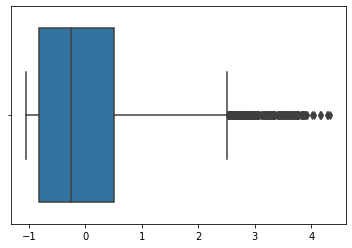

In [8]:
sns.boxplot(x=target_var)

In [9]:
target_var = pd.DataFrame(target_var, columns = ['count'])

In [10]:
Q1=target_var.quantile(0.25)
Q3=target_var.quantile(0.75)

IQR=Q3-Q1


lowqe_bound=Q1 - 1.5 * IQR
upper_bound=Q3 + 1.5 * IQR

print(lowqe_bound,upper_bound)

count   -2.829773
dtype: float64 count    2.514274
dtype: float64


In [11]:
IQR_count = target_var[~((target_var < lowqe_bound) |(target_var > upper_bound)).any(axis=1)]
IQR_count.shape

(10586, 1)

In [12]:
target_var

,count
0,-0.969294
1,-0.836797
2,-0.880962
3,-0.985856
4,-1.052104
...,...
10881,0.797333
10882,0.272866
10883,-0.130146
10884,-0.345454


In [13]:
target_index = target_var.index
IQR_count_index = IQR_count.index

In [14]:
for i in target_index:
    if i not in IQR_count_index:
        data = data.drop(i)
        dataframe = dataframe.drop(i)

In [15]:
target_var = IQR_count

In [16]:
target_var = target_var.to_numpy()

In [17]:
data

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day,month,year,hours,minutes,seconds
0,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,1,1,2011,0,0,0
1,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,1,2011,1,0,0
2,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,1,1,2011,2,0,0
3,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,1,1,2011,3,0,0
4,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,1,1,2011,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,19,12,2012,19,0,0
10882,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,19,12,2012,20,0,0
10883,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,19,12,2012,21,0,0
10884,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,19,12,2012,22,0,0


In [18]:
dataframe

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day,month,year,hours,minutes,seconds
0,-1.349864,-0.17149,-1.460672,-0.660178,-1.333661,-1.092737,0.993213,-1.567754,-0.660992,-0.943854,-0.969294,-1.642070,-1.603121,-1.003866,-1.668944,0.0,0.0
1,-1.349864,-0.17149,-1.460672,-0.660178,-1.438907,-1.182421,0.941249,-1.567754,-0.560908,-0.818052,-0.836797,-1.642070,-1.603121,-1.003866,-1.524341,0.0,0.0
2,-1.349864,-0.17149,-1.460672,-0.660178,-1.438907,-1.182421,0.941249,-1.567754,-0.620958,-0.851158,-0.880962,-1.642070,-1.603121,-1.003866,-1.379739,0.0,0.0
3,-1.349864,-0.17149,-1.460672,-0.660178,-1.333661,-1.092737,0.681430,-1.567754,-0.660992,-0.963717,-0.985856,-1.642070,-1.603121,-1.003866,-1.235137,0.0,0.0
4,-1.349864,-0.17149,-1.460672,-0.660178,-1.333661,-1.092737,0.681430,-1.567754,-0.721042,-1.023307,-1.052104,-1.642070,-1.603121,-1.003866,-1.090534,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,1.338012,-0.17149,0.684616,-0.660178,-0.596935,-0.467310,-0.617666,1.617227,-0.580925,1.148417,0.797333,1.644787,1.590639,0.996149,1.078500,0.0,0.0
10882,1.338012,-0.17149,0.684616,-0.660178,-0.702182,-0.735182,-0.253919,0.269704,-0.520875,0.499548,0.272866,1.644787,1.590639,0.996149,1.223102,0.0,0.0
10883,1.338012,-0.17149,0.684616,-0.660178,-0.807428,-0.913959,-0.046064,0.269704,-0.640975,0.055934,-0.130146,1.644787,1.590639,0.996149,1.367704,0.0,0.0
10884,1.338012,-0.17149,0.684616,-0.660178,-0.807428,-0.735182,-0.046064,-0.832442,-0.480841,-0.255258,-0.345454,1.644787,1.590639,0.996149,1.512307,0.0,0.0


In [19]:
data = data.reset_index()
dataframe = dataframe.reset_index()

In [20]:
# to check if there's any missing data
data.isna().sum().rename('num_of_missing')

index         0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
day           0
month         0
year          0
hours         0
minutes       0
seconds       0
Name: num_of_missing, dtype: int64

In [21]:
data = data.iloc[:,0:]

label_encoder = LabelEncoder()
data.iloc[:,0] = label_encoder.fit_transform(data.iloc[:,0]).astype('float64')

corr = data.corr()

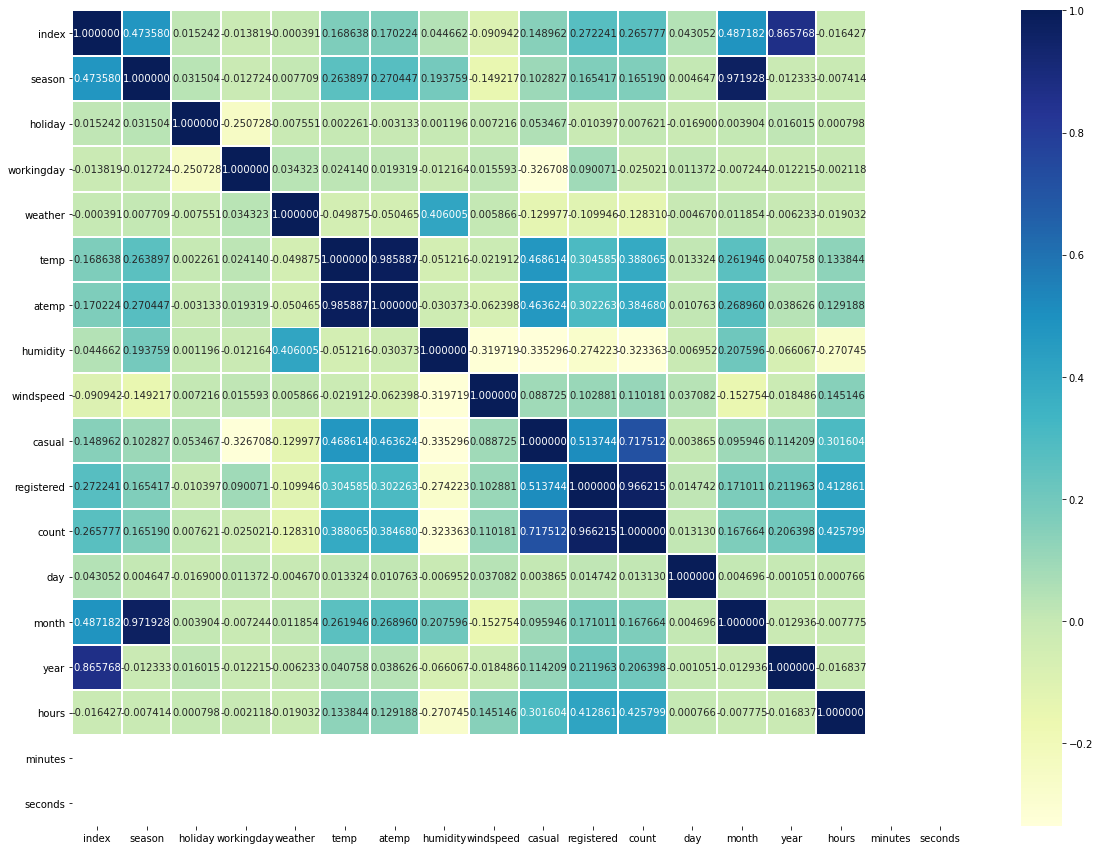

In [22]:
plt.subplots(figsize=(20,15))
sns.heatmap(corr,linewidths=1,cmap="YlGnBu",annot=True, fmt="f")

In [23]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.8:
            if columns[j]:
                columns[j] = False
selected_columns = data.columns[columns]
data = data[selected_columns]

In [24]:
data

,index,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,day,hours,minutes,seconds
0,0.0,1,0,0,1,9.84,81,0.0000,3,13,1,0,0,0
1,1.0,1,0,0,1,9.02,80,0.0000,8,32,1,1,0,0
2,2.0,1,0,0,1,9.02,80,0.0000,5,27,1,2,0,0
3,3.0,1,0,0,1,9.84,75,0.0000,3,10,1,3,0,0
4,4.0,1,0,0,1,9.84,75,0.0000,0,1,1,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10581,10581.0,4,0,1,1,15.58,50,26.0027,7,329,19,19,0,0
10582,10582.0,4,0,1,1,14.76,57,15.0013,10,231,19,20,0,0
10583,10583.0,4,0,1,1,13.94,61,15.0013,4,164,19,21,0,0
10584,10584.0,4,0,1,1,13.94,61,6.0032,12,117,19,22,0,0


In [25]:
def drop_constant_columns(dataframe):
    """
    Drops constant value columns of pandas dataframe.
    """
    result = dataframe.copy()
    for column in dataframe.columns:
        if len(dataframe[column].unique()) == 1:
            result = result.drop(column,axis=1)
    return result

In [26]:
data = drop_constant_columns(data)

In [27]:
# In the data discription, the count column is the sum of registered and casual features so we can remove them
data.drop(columns=['registered','casual'], inplace=True)

In [28]:
# From the plots we can tell that the season feature doesn't affect the target variable (count), which means we can get rid of it
data.drop(columns='season', inplace=True)

In [29]:
# Year doesn't affect the target variable
#data.drop(columns='year', inplace=True)

In [30]:
# Wokring day covers holidays and the days (Sat-Fri) means that there's no need for them 
data.drop(columns=['day','holiday'], inplace=True)

In [31]:
data

,index,workingday,weather,temp,humidity,windspeed,hours
0,0.0,0,1,9.84,81,0.0000,0
1,1.0,0,1,9.02,80,0.0000,1
2,2.0,0,1,9.02,80,0.0000,2
3,3.0,0,1,9.84,75,0.0000,3
4,4.0,0,1,9.84,75,0.0000,4
...,...,...,...,...,...,...,...
10581,10581.0,1,1,15.58,50,26.0027,19
10582,10582.0,1,1,14.76,57,15.0013,20
10583,10583.0,1,1,13.94,61,15.0013,21
10584,10584.0,1,1,13.94,61,6.0032,22


In [32]:
data.drop(columns='index', inplace=True)

In [33]:
scaler = StandardScaler()
scaled = scaler.fit_transform(data)

In [34]:
dataframe = pd.DataFrame(scaled, columns = data.columns)
dataframe

,workingday,weather,temp,humidity,windspeed,hours
0,-1.445961,-0.663828,-1.313626,0.979432,-1.563273,-1.646050
1,-1.445961,-0.663828,-1.419009,0.927431,-1.563273,-1.502374
2,-1.445961,-0.663828,-1.419009,0.927431,-1.563273,-1.358697
3,-1.445961,-0.663828,-1.313626,0.667426,-1.563273,-1.215021
4,-1.445961,-0.663828,-1.313626,0.667426,-1.563273,-1.071344
...,...,...,...,...,...,...
10581,0.691582,-0.663828,-0.575944,-0.632598,1.618247,1.083803
10582,0.691582,-0.663828,-0.681327,-0.268591,0.272188,1.227480
10583,0.691582,-0.663828,-0.786710,-0.060588,0.272188,1.371156
10584,0.691582,-0.663828,-0.786710,-0.060588,-0.828761,1.514833


In [35]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import pickle
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

In [36]:
Pipe = make_pipeline(StandardScaler(),PolynomialFeatures(degree=2),LinearRegression())
Pipe.fit(data,target_var)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [37]:
pickle.dump(Pipe, open('./model.sav', 'wb'))